# Loan Application Status Prediction

Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, 
loan amount, their income, dependents etc. 


Independent Variables:
    
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the 
    basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, 
     especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than
    for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan 
    application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to 
    repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on 
the basis of the details provided in the dataset. 

Dataset Link-  

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv


In [3]:
# Import neccessory libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot  as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset

df=pd.read_csv(r"D:\5.7.2024 BR\Excel Report\Data project\evaluation/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Unnamed: 10,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
# Checking the dimension of the dataset
df.shape

(614, 13)

In [9]:
# Checking the columns of the datasdet
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount',
 'Loan_Amount_Term',
 'Unnamed: 10',
 'Property_Area',
 'Loan_Status']

In [11]:
# Checking the data types of columns

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
Unnamed: 10          float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
# Check the information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Unnamed: 10        564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
# Removing unwanted column 
df.drop("Unnamed: 10", axis =1 , inplace=True)

In [17]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount          22
Loan_Amount_Term     14
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [21]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [23]:
# Fill the null values 

df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Loan_Amount"]=df["Loan_Amount"].fillna(df["Loan_Amount"].mode()[0])
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 57.7+ KB


In [27]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

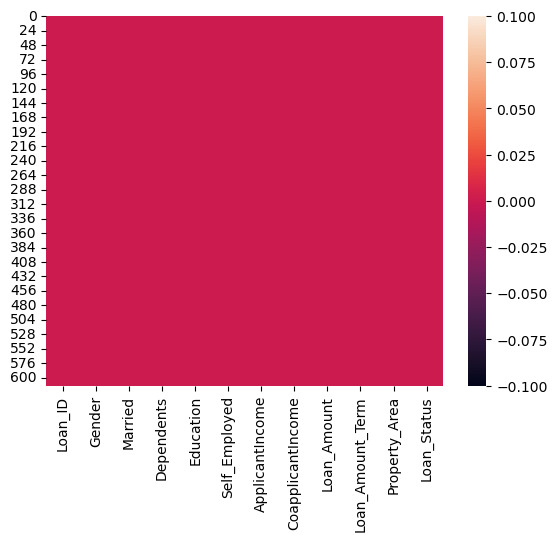

In [29]:
# Let's the visualize it using heatmap
sns.heatmap(df.isnull())

In [31]:
# Encoding categorical columns using ordinal encoder columns like gender, Marries, dependents etc.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,2.0,1.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    float64
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    float64
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 57.7 KB


In [35]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.465798,342.410423,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.180967,64.428629,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,1.000000


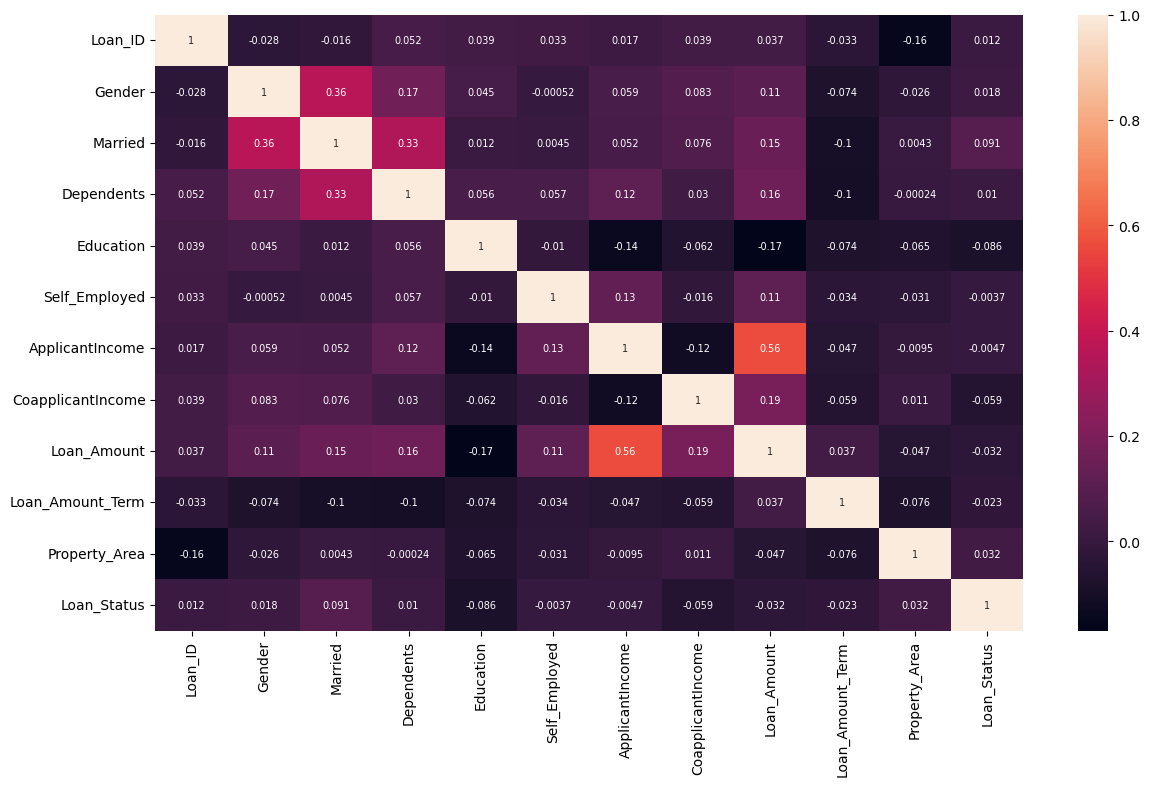

In [37]:
# Plotting Heatmap (Correlation matrix)
df_corr = df.corr() 

plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':7})
plt.show()

In [39]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
Loan_Amount          2.745407
Loan_Amount_Term    -2.402112
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

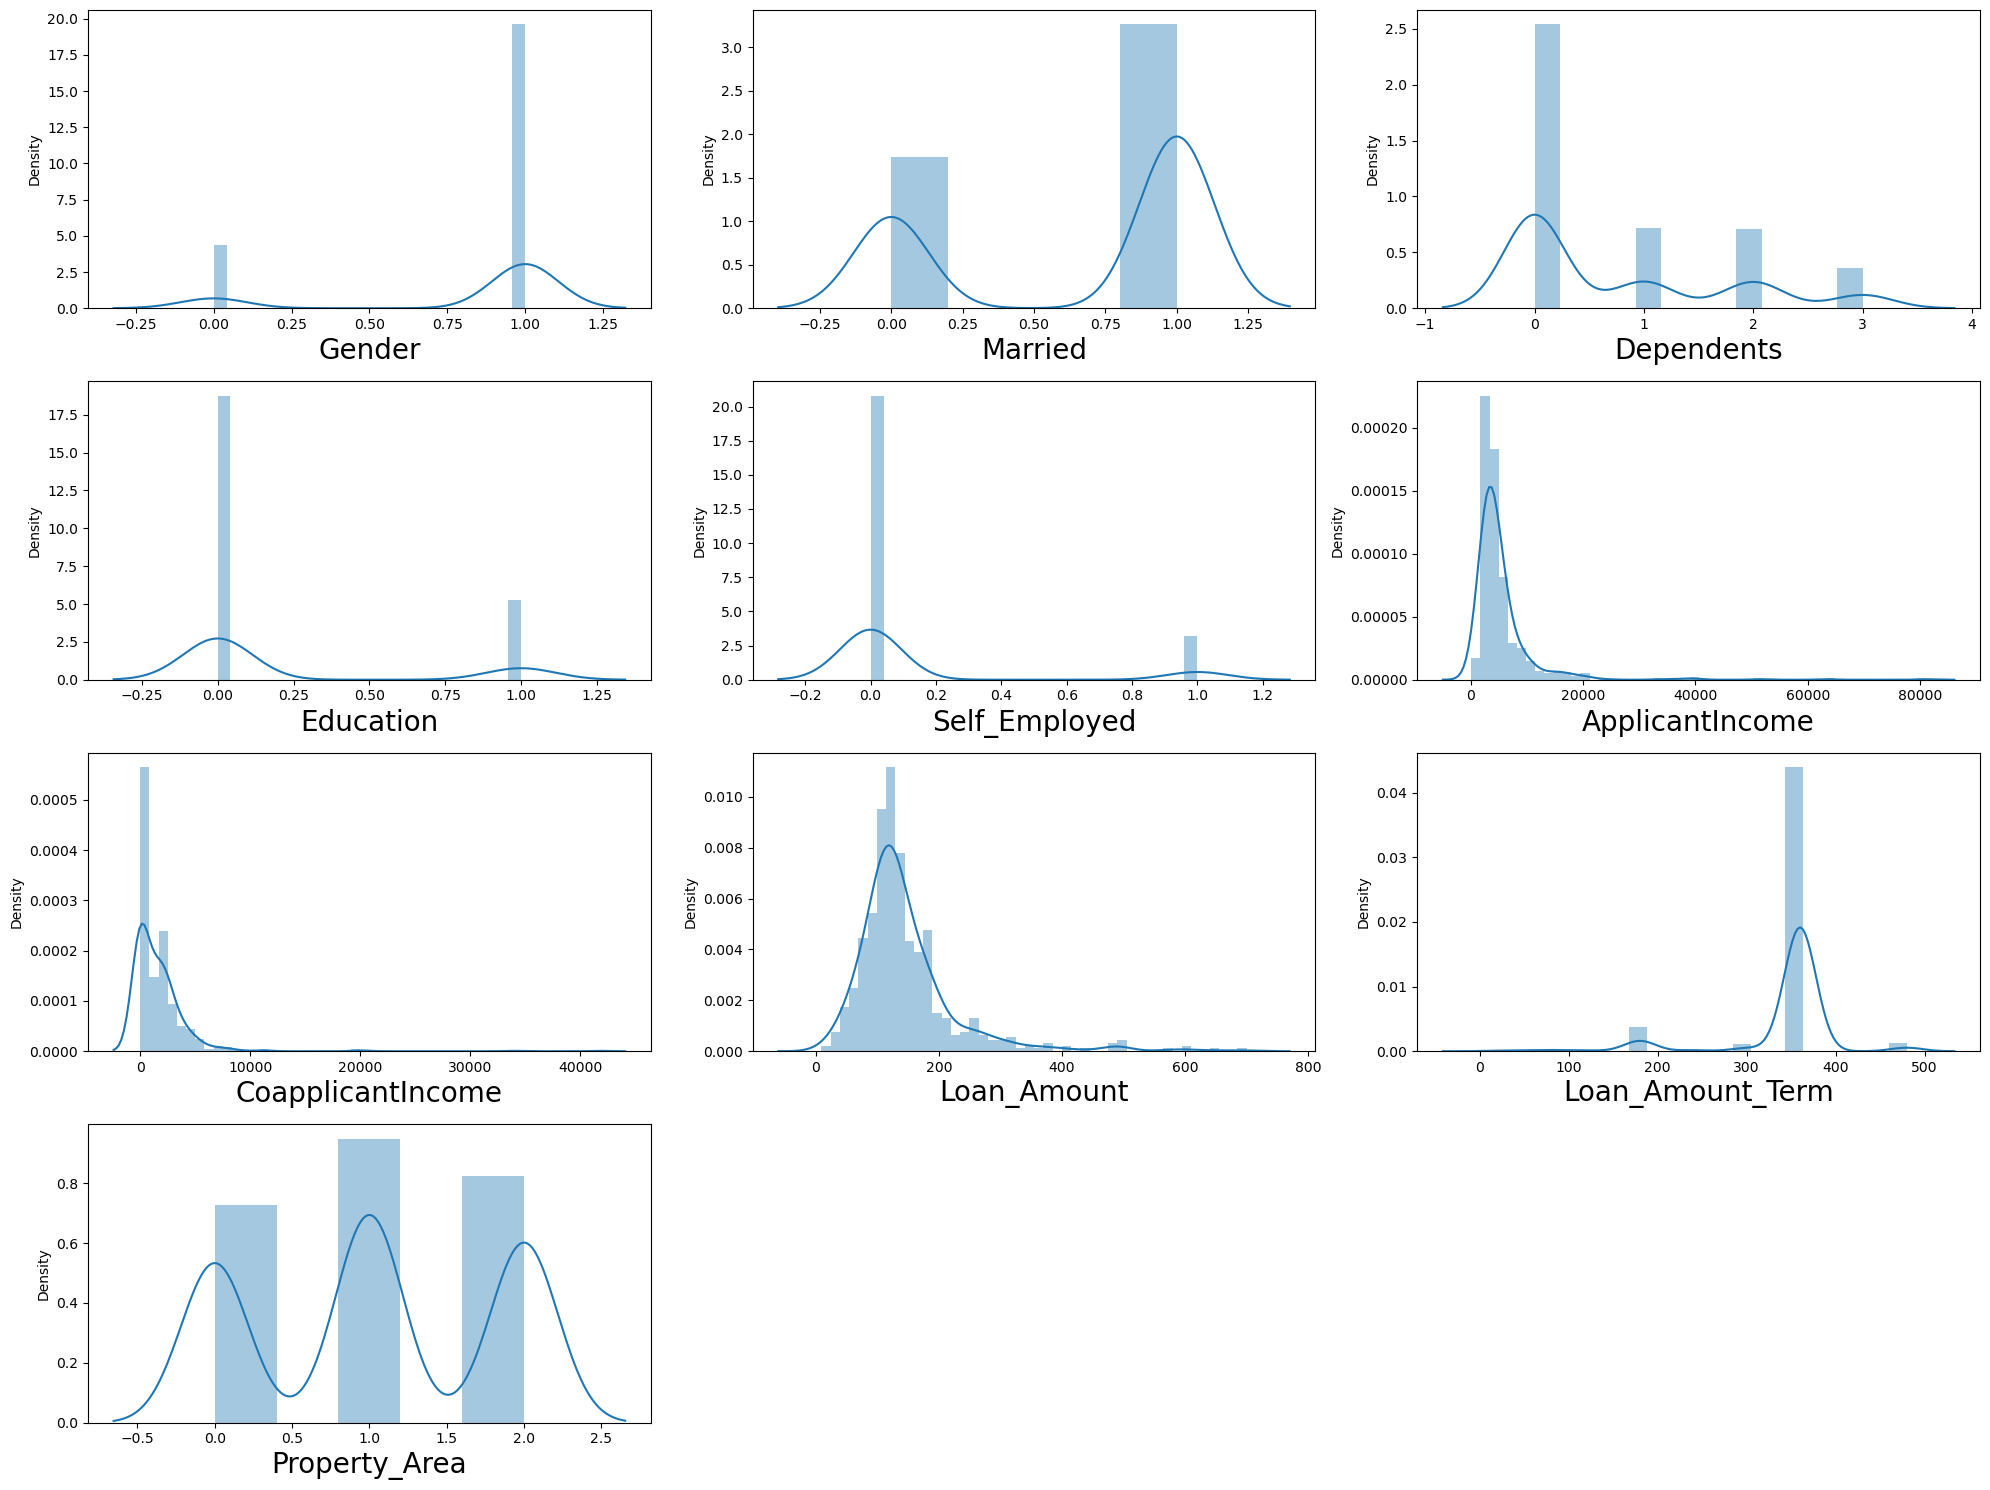

In [41]:
# draw the distplot all the features to identify the distribution of data.

plt.figure(figsize=(20,15))
plotnumber =1
for column in df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Property_Area']]:
    if plotnumber <=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

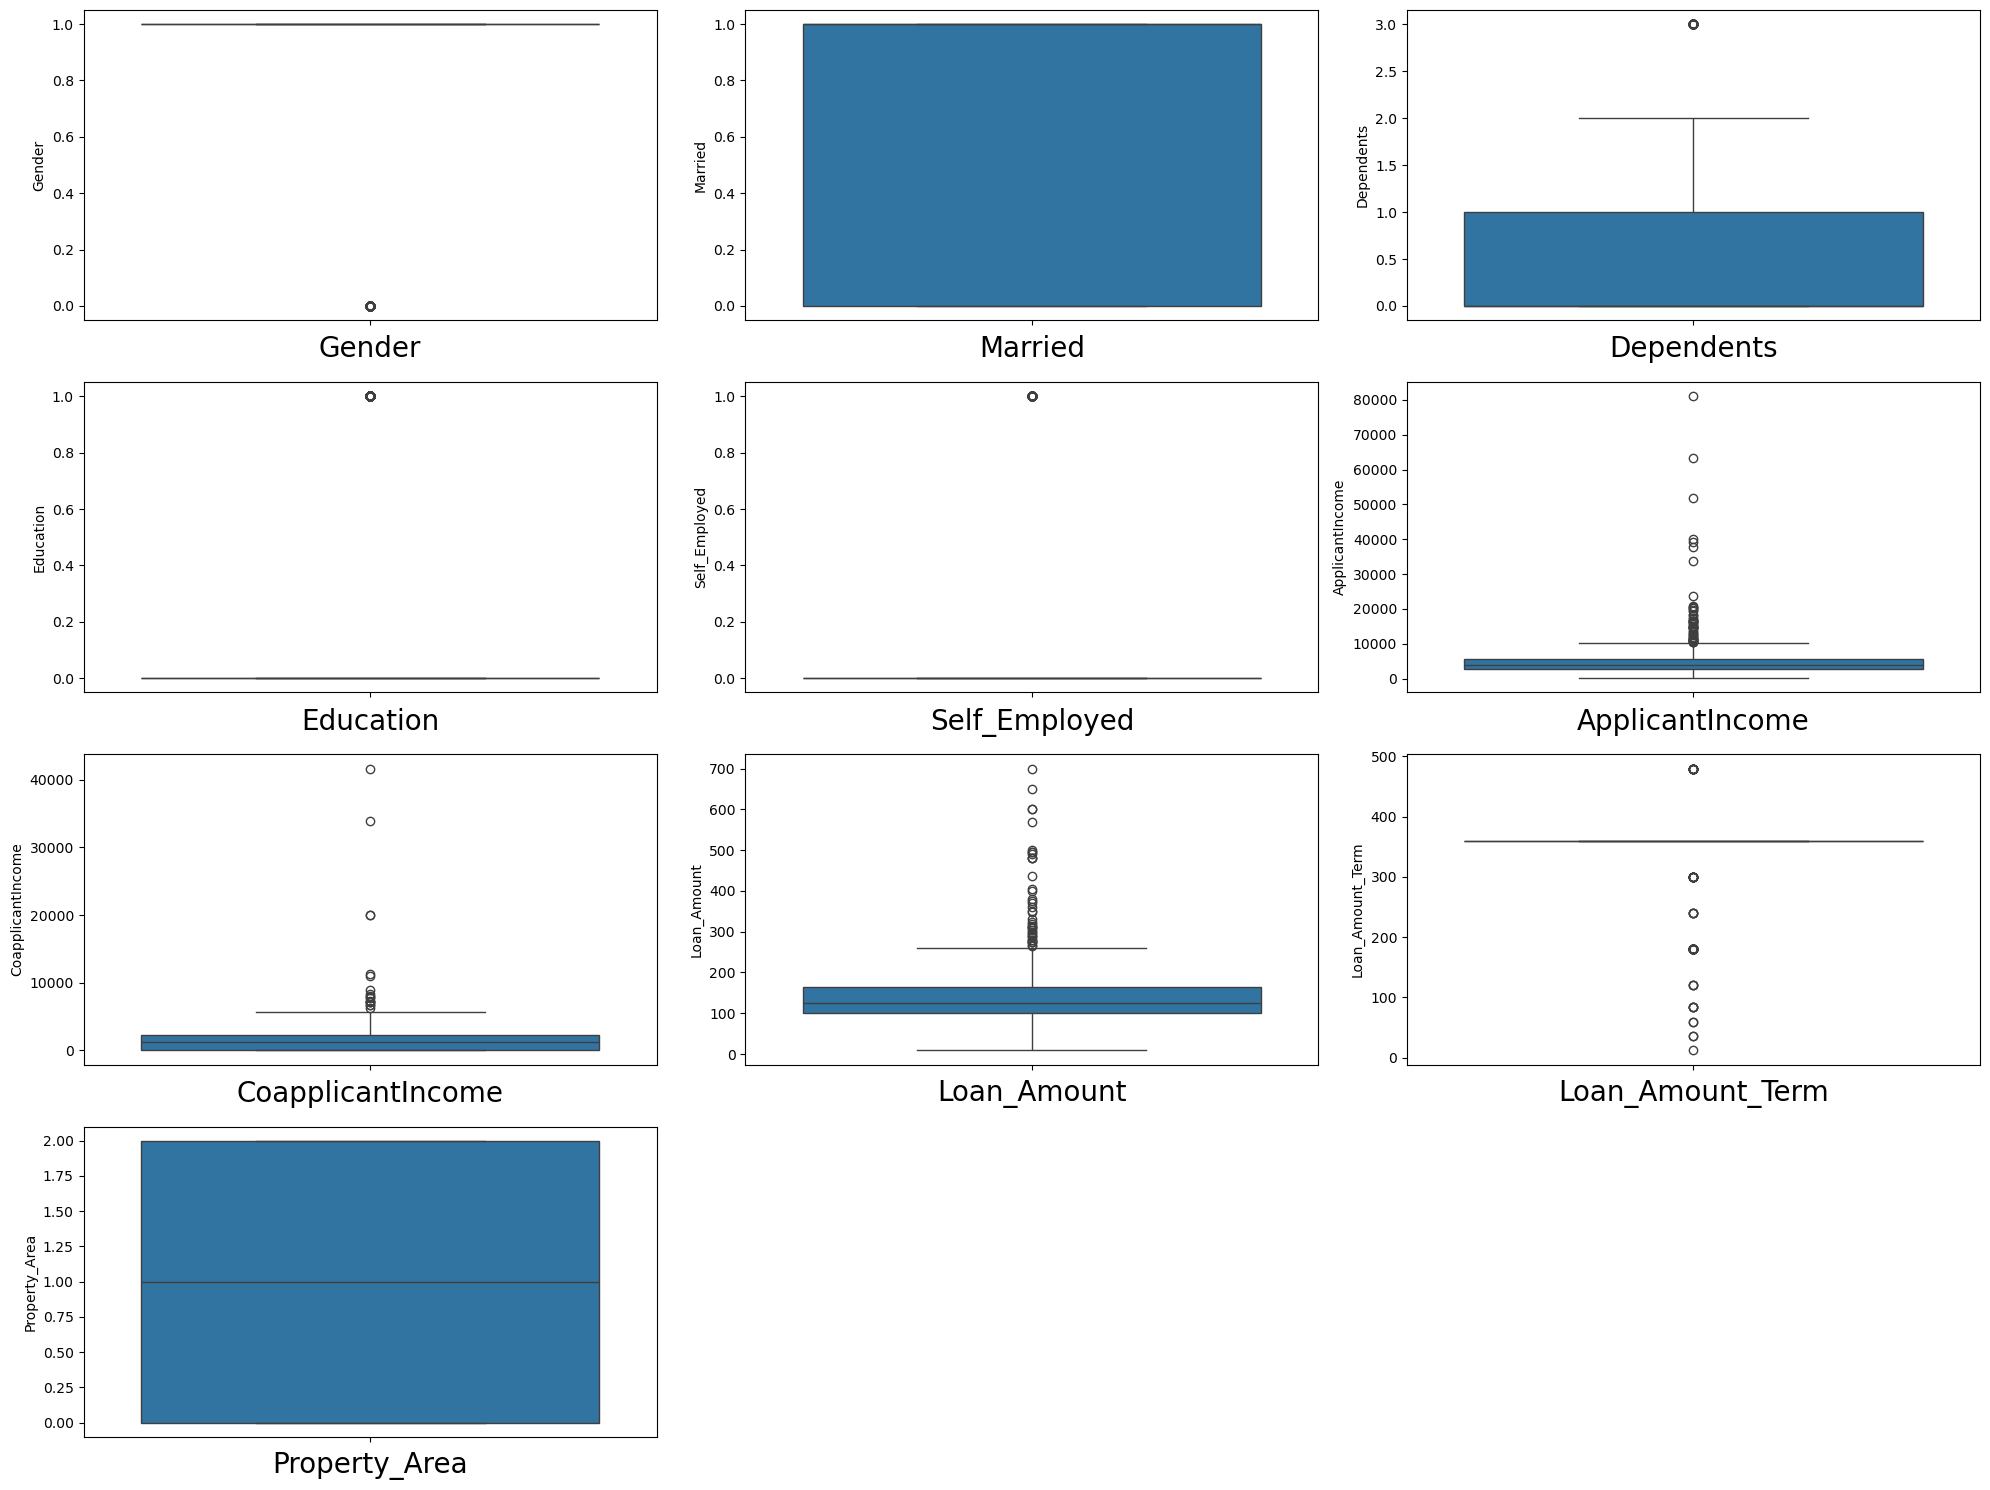

In [43]:
# Using the barplot draw the data to identify outliers

plt.figure(figsize=(20,15))
plotnumber =1
for column in df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Property_Area']]:
    if plotnumber <=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

Above boxplot i don't know what data is remove or not so, i go with all the outliers 

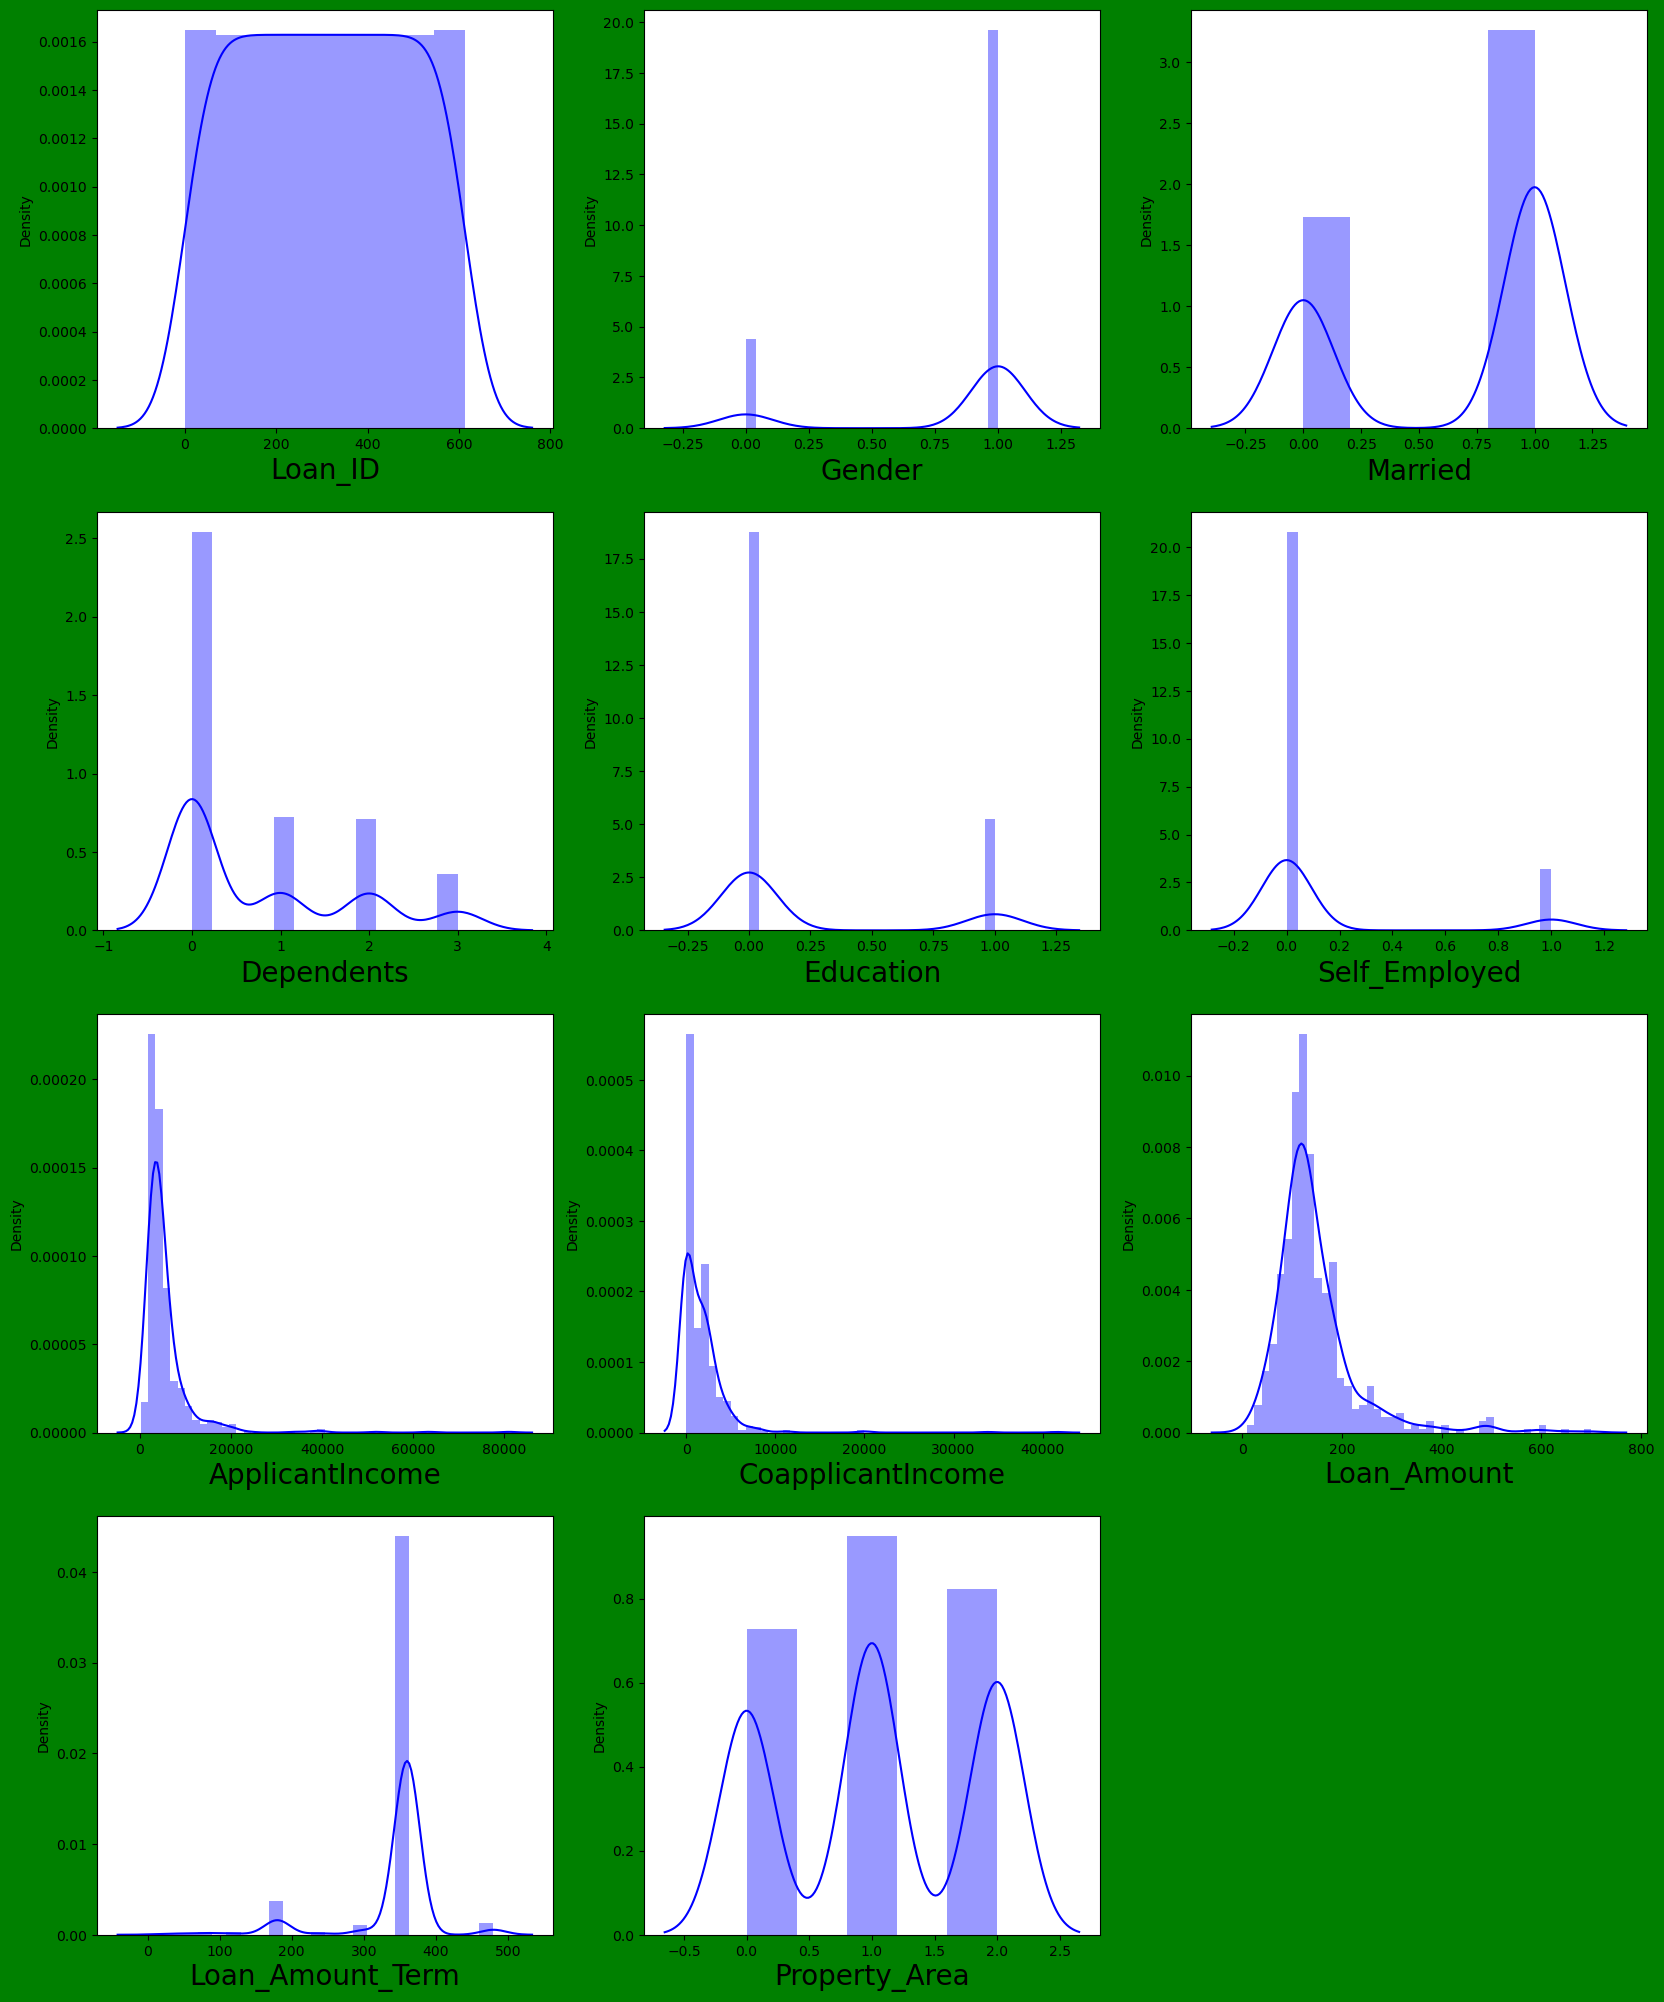

In [45]:
# check skewness of features using displot 

plt.figure(figsize=(20,25), facecolor='green')
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color="b")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()



Applicant income and co applicant income having little bit of skewness so, deal with this using cube root method.

In [47]:
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])

In [49]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
Loan_Amount          2.745407
Loan_Amount_Term    -2.402112
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

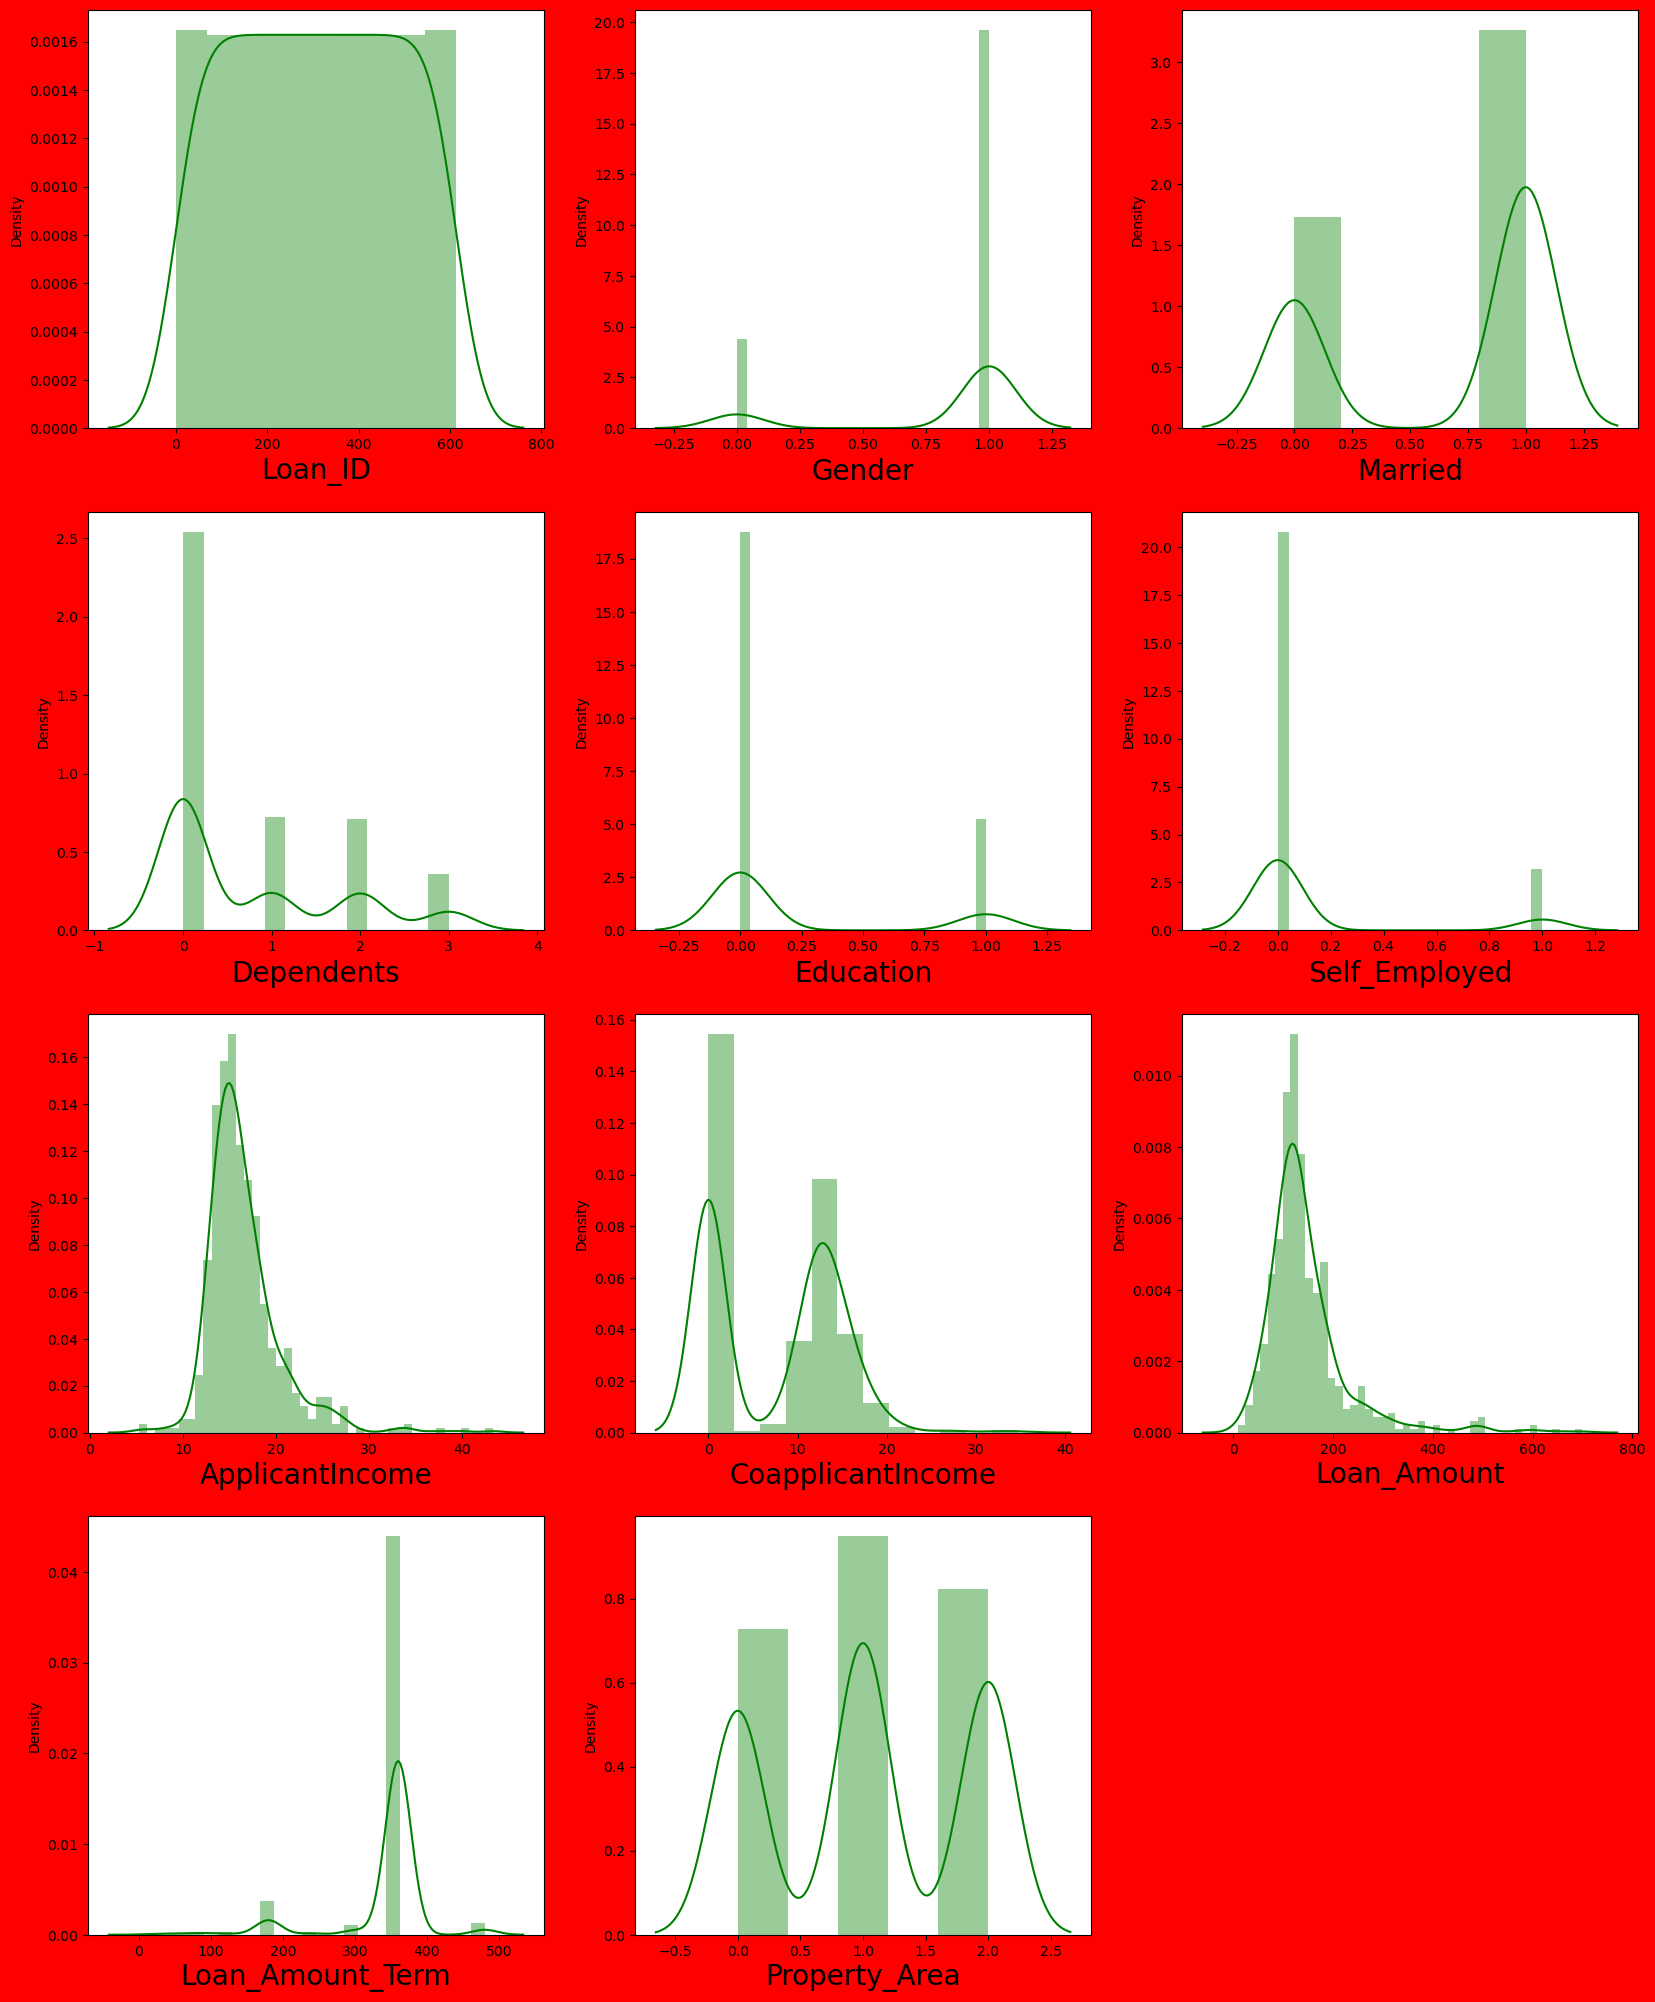

In [51]:
# Let us visualize again 


plt.figure(figsize=(20,25), facecolor='red')
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()



In [ ]:
df.corr()

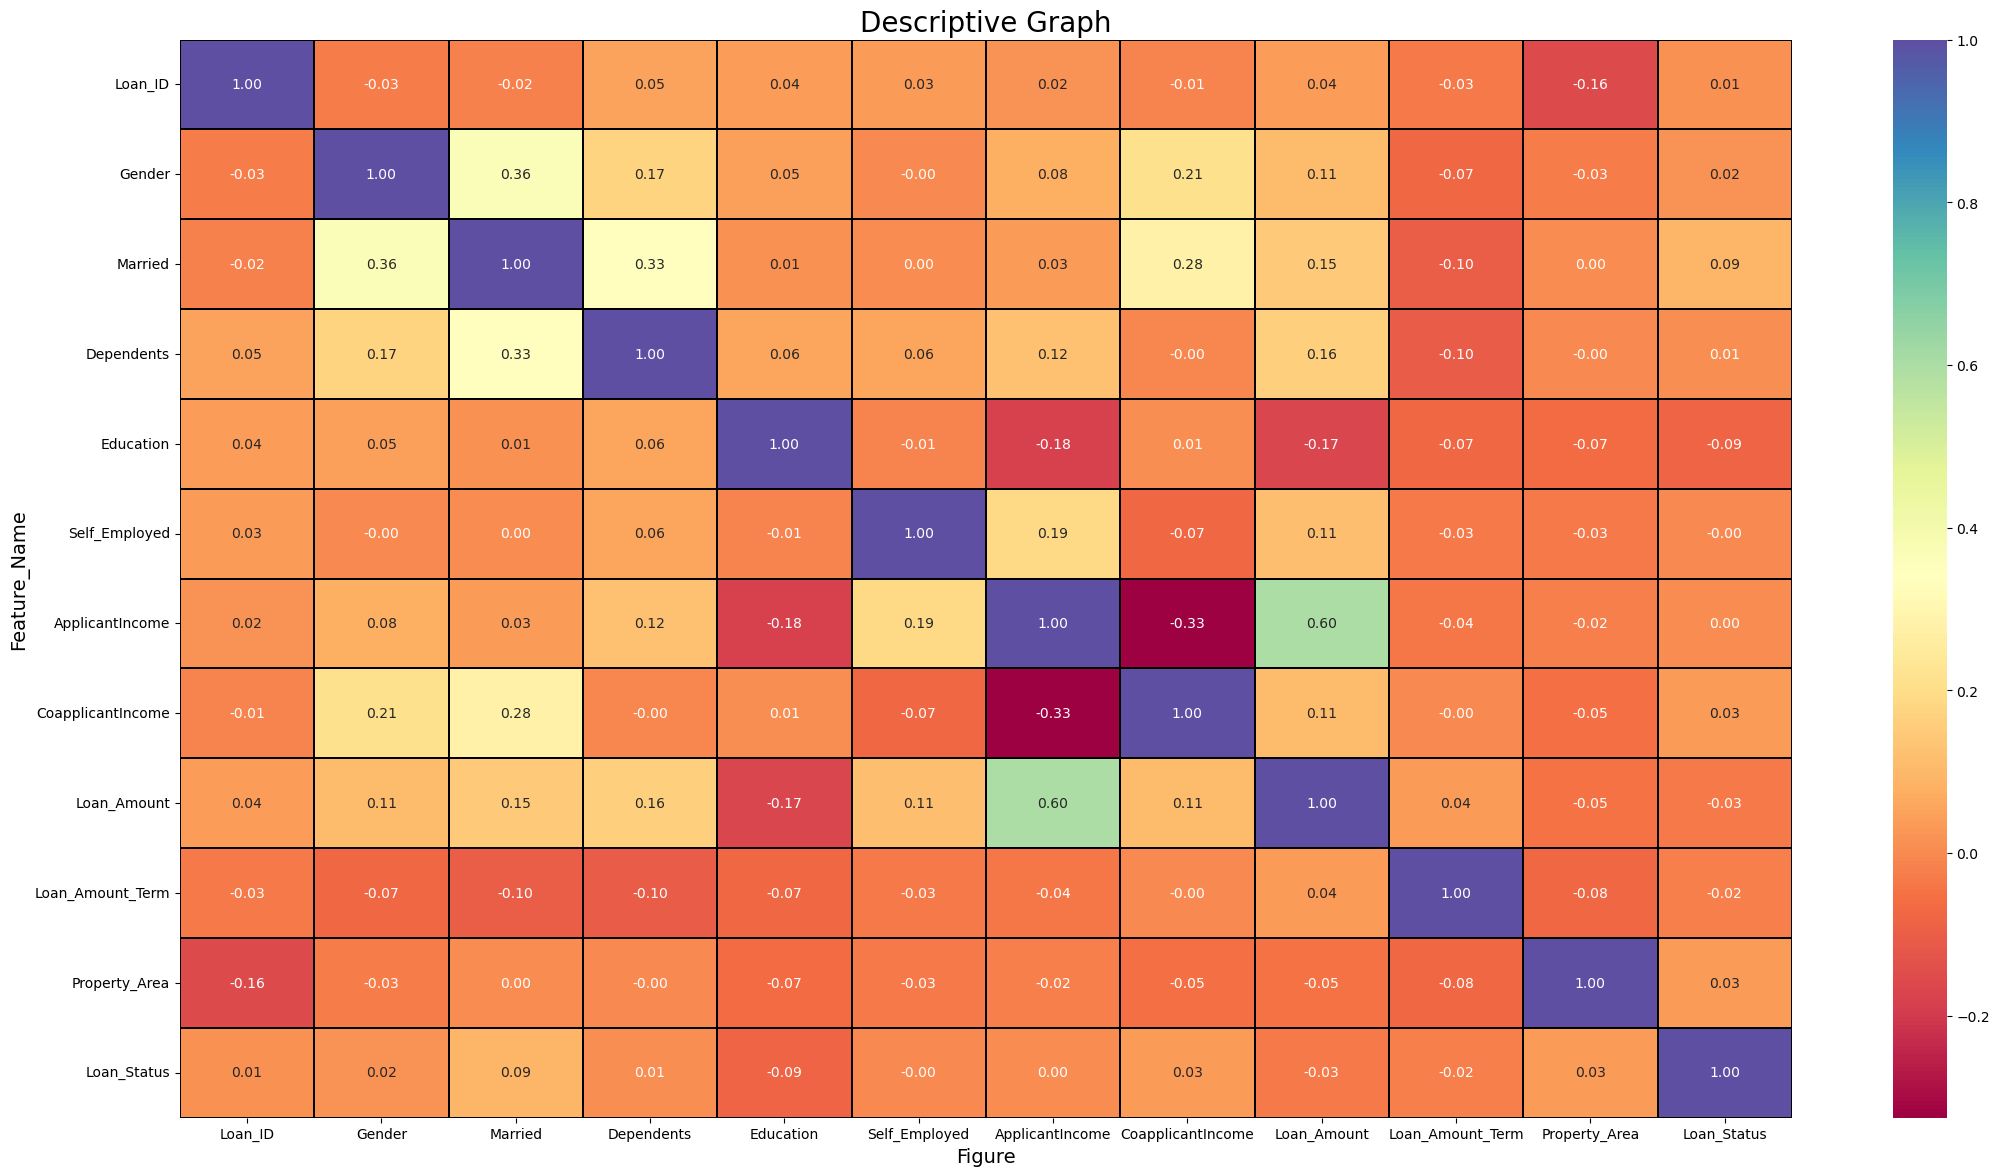

In [53]:
# Draw correlation using heatmap

plt.figure(figsize=(26,14))
sns.heatmap(df.corr(), annot=True, fmt='0.2f',linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Feature_Name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

<Figure size 2000x1500 with 0 Axes>

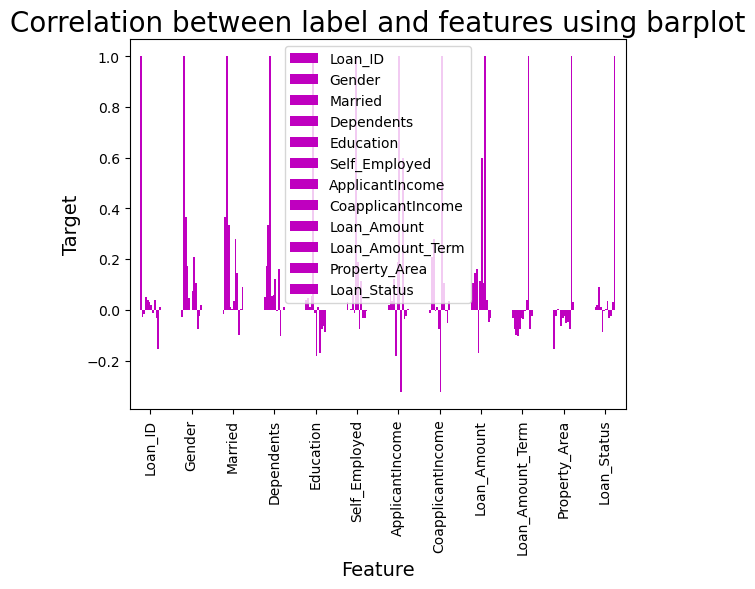

In [55]:
# correlation between features and label using barplot


plt.figure(figsize=(20,15))
df.corr().plot(kind='bar', color="m")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.title('Correlation between label and features using barplot', fontsize=20)
plt.show()

Gender
1.0    502
0.0    112
Name: count, dtype: int64


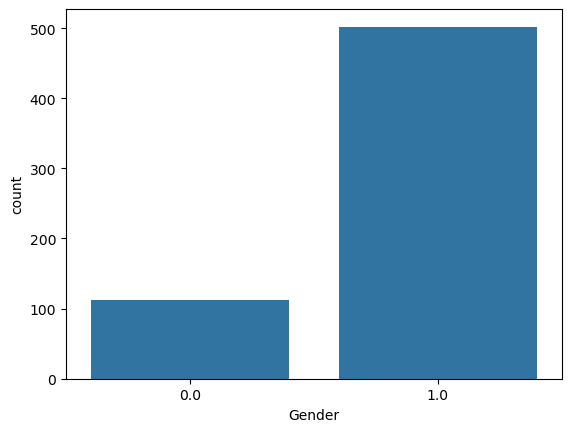

In [57]:
# check no.of gender (male and female) using countplot
ax = sns.countplot(x='Gender', data=df)
print(df['Gender'].value_counts())

Married
1.0    401
0.0    213
Name: count, dtype: int64


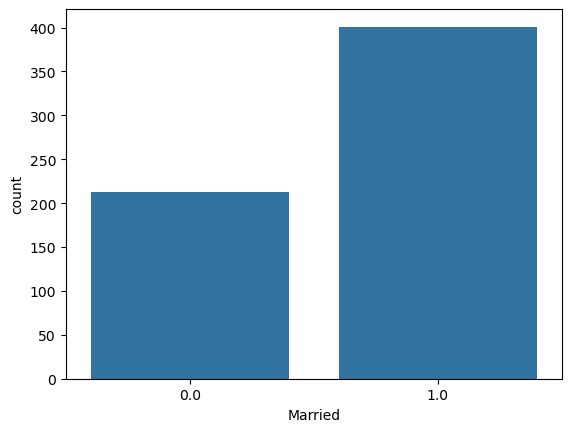

In [59]:
# check no.of married using countplot
ax = sns.countplot(x='Married', data=df)
print(df['Married'].value_counts())

Dependents
0.0    360
1.0    102
2.0    101
3.0     51
Name: count, dtype: int64


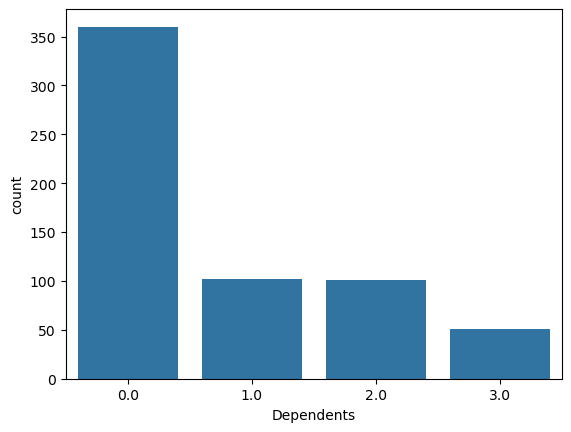

In [61]:
# check no. of dependents using countplot
ax = sns.countplot(x='Dependents', data=df)
print(df['Dependents'].value_counts())

Education
0.0    480
1.0    134
Name: count, dtype: int64


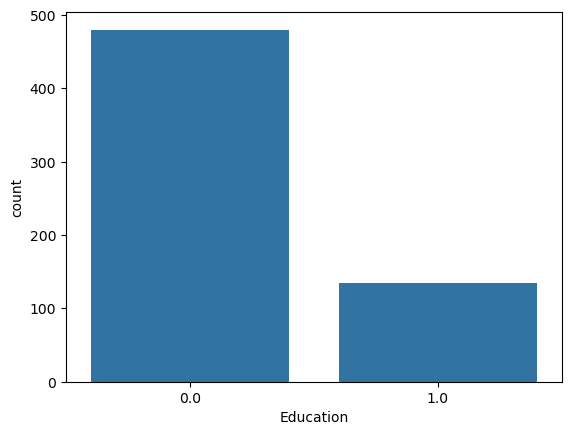

In [63]:
# check no.of education using countplot
ax = sns.countplot(x='Education', data=df)
print(df['Education'].value_counts())

Self_Employed
0.0    532
1.0     82
Name: count, dtype: int64


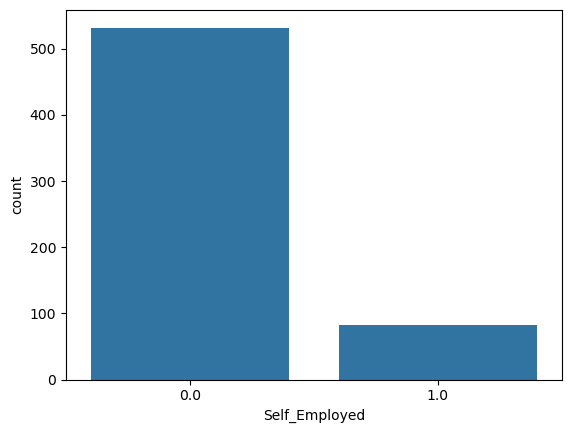

In [65]:
# check no.of self employed using countplot
ax = sns.countplot(x='Self_Employed', data=df)
print(df['Self_Employed'].value_counts())

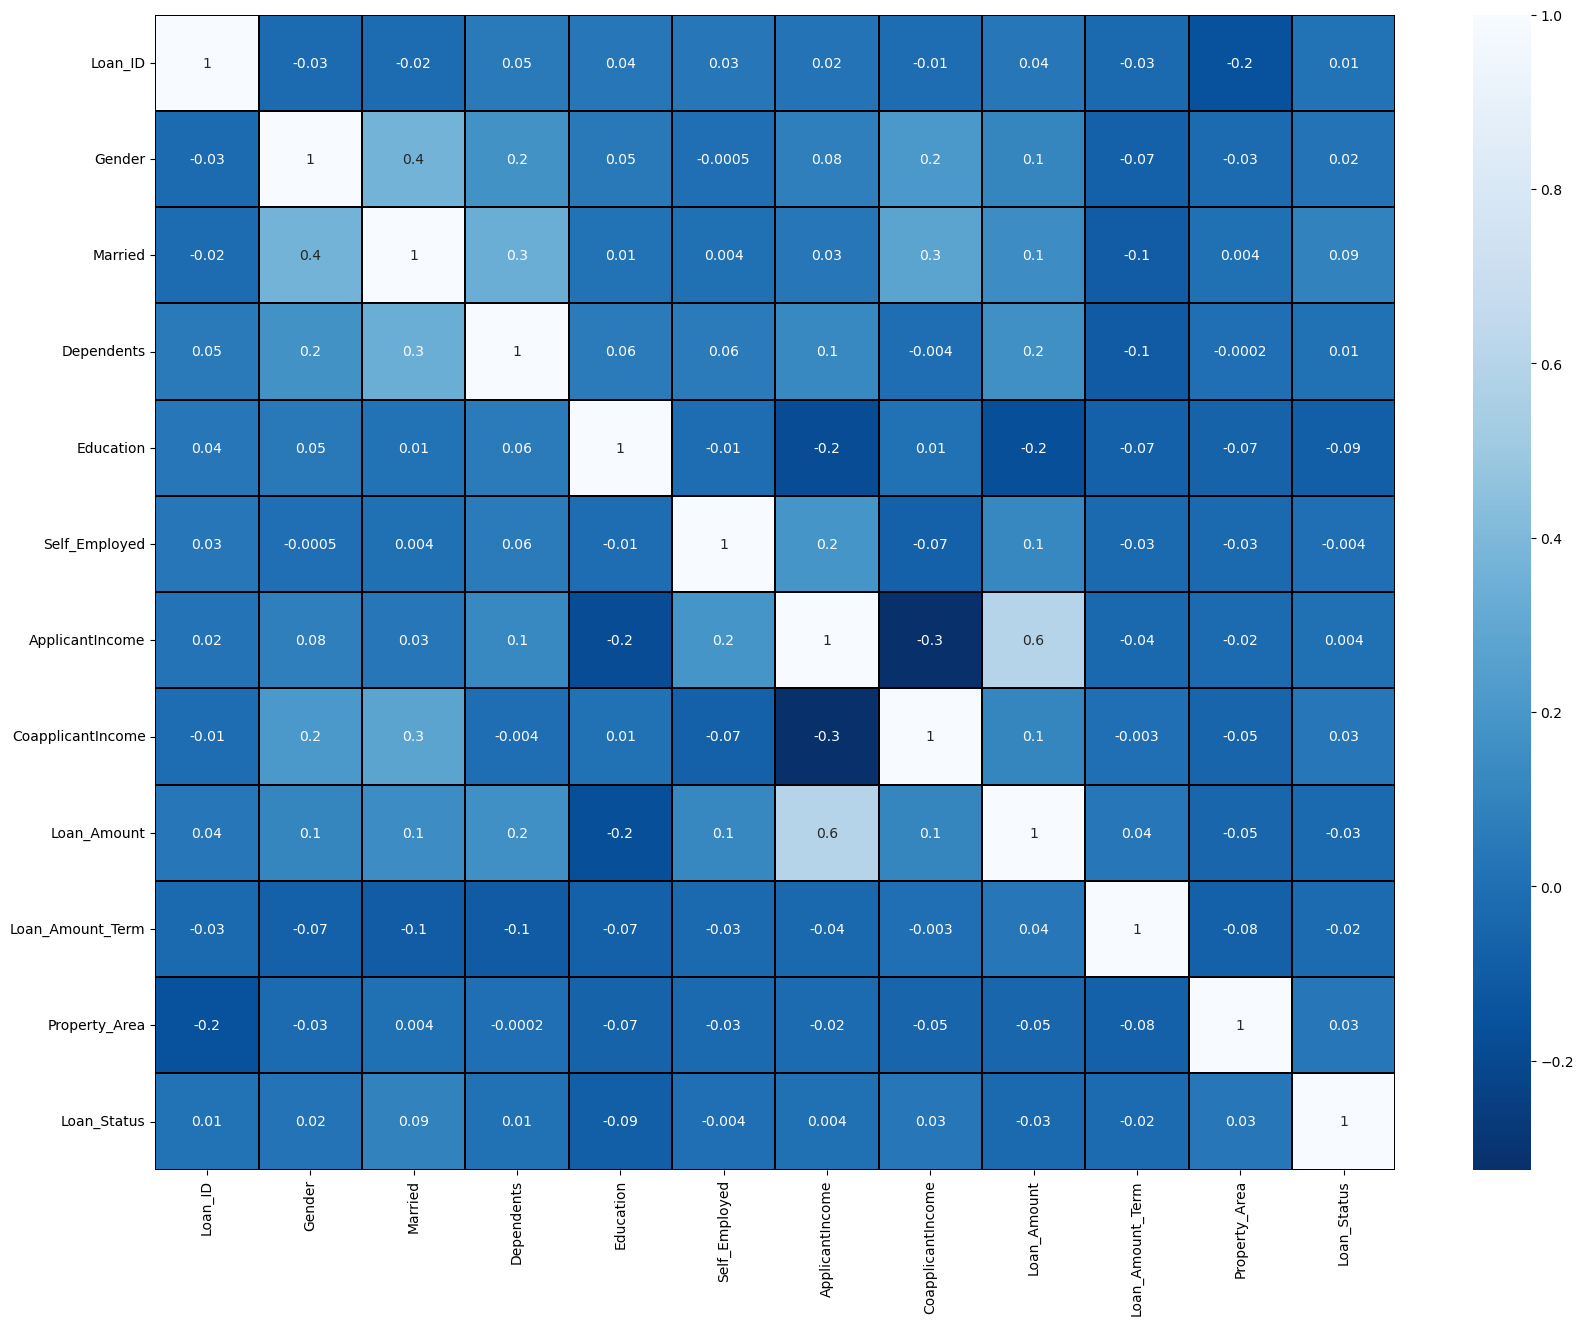

In [67]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()


# Separating features and label

In [69]:
x = df.drop("Loan_Status",axis = 1)
y = df["Loan_Status"]

# Feature scaling using standard Scalarization

In [71]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Property_Area
0,-1.729232,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.380325,-1.053225,-0.302759,0.273231,1.223298
1,-1.723590,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.022870,0.561256,-0.207648,0.273231,-1.318513
2,-1.717948,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.533028,-1.053225,-0.944757,0.273231,1.223298
3,-1.712307,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.711341,0.820678,-0.302759,0.273231,1.223298
4,-1.706665,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.419383,-1.053225,-0.053093,0.273231,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,1.706665,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.574203,-1.053225,-0.885313,0.273231,-1.318513
610,1.712307,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.128936,-1.053225,-1.253868,-2.522836,-1.318513
611,1.717948,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.899211,-0.178302,1.278459,0.273231,1.223298
612,1.723590,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.794146,-1.053225,0.493794,0.273231,1.223298


In [73]:
# Finding varience inflation factor in each scaled column i.e., x.shape[1](1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"]=x.columns
vif

,VIF values,features
0,1.034695,Loan_ID
1,1.200242,Gender
2,1.359202,Married
3,1.181574,Dependents
4,1.066036,Education
5,1.041207,Self_Employed
6,2.160769,ApplicantIncome
7,1.496017,CoapplicantIncome
8,1.905012,Loan_Amount
9,1.041991,Loan_Amount_Term


In [75]:
# Again checking VIF values to confirm weather the multicollinearity still exists or not 

vif = pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.034695,Loan_ID
1,1.200242,Gender
2,1.359202,Married
3,1.181574,Dependents
4,1.066036,Education
5,1.041207,Self_Employed
6,2.160769,ApplicantIncome
7,1.496017,CoapplicantIncome
8,1.905012,Loan_Amount
9,1.041991,Loan_Amount_Term


In [77]:
# Droping ID Number column
x.drop("Loan_ID", axis = 1, inplace = True)

In [79]:
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.198922,Gender
1,1.358487,Married
2,1.178572,Dependents
3,1.065157,Education
4,1.040726,Self_Employed
5,2.160042,ApplicantIncome
6,1.495614,CoapplicantIncome
7,1.902331,Loan_Amount
8,1.039929,Loan_Amount_Term
9,1.019433,Property_Area


# Feature selection using PCA

In [81]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x)

array([[-0.81641932,  1.28493928,  0.17643364, ..., -0.93790239,
         0.68438779,  0.01231084],
       [ 0.52410899, -0.77416893, -0.94096284, ..., -0.56092038,
        -0.19853402,  0.29731537],
       [-0.1873381 ,  0.39355963,  0.95943132, ..., -1.46092032,
        -0.83772266, -0.47042226],
       ...,
       [ 1.55946724,  0.40693662, -0.27508114, ...,  0.15761254,
        -0.24145975, -0.24102251],
       [ 1.40240617,  0.4199162 ,  0.63748189, ..., -0.31677489,
        -0.05291089, -0.1490171 ],
       [-1.20852658,  2.67492178,  0.52306555, ...,  0.46698544,
        -0.19427768, -0.2371887 ]])

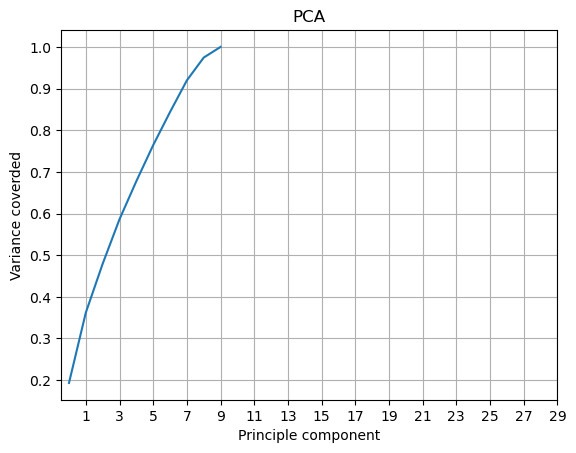

In [83]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,31,2))
plt.xlabel('Principle component')
plt.ylabel('Variance coverded')
plt.title('PCA')
plt.show()

In [85]:
pca = PCA(n_components=10)
new_x= pca.fit_transform(x)
new_x

array([[-0.81641932,  1.28493928,  0.17643364, ..., -0.93790239,
         0.68438779,  0.01231084],
       [ 0.52410899, -0.77416893, -0.94096284, ..., -0.56092038,
        -0.19853402,  0.29731537],
       [-0.1873381 ,  0.39355963,  0.95943132, ..., -1.46092032,
        -0.83772266, -0.47042226],
       ...,
       [ 1.55946724,  0.40693662, -0.27508114, ...,  0.15761254,
        -0.24145975, -0.24102251],
       [ 1.40240617,  0.4199162 ,  0.63748189, ..., -0.31677489,
        -0.05291089, -0.1490171 ],
       [-1.20852658,  2.67492178,  0.52306555, ...,  0.46698544,
        -0.19427768, -0.2371887 ]])

# Model development

In [87]:


X=new_x
y=df["Loan_Status"].values

In [89]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Data Split into train and test

In [91]:
# Data split into train and test 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [93]:
# Checking accuracy for RandomForestClassifier 
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))


0.6270270270270271
[[  9  48]
 [ 21 107]]
              precision    recall  f1-score   support

         0.0       0.30      0.16      0.21        57
         1.0       0.69      0.84      0.76       128

    accuracy                           0.63       185
   macro avg       0.50      0.50      0.48       185
weighted avg       0.57      0.63      0.59       185



In [95]:
# Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))


0.6810810810810811
[[  2  55]
 [  4 124]]
              precision    recall  f1-score   support

         0.0       0.33      0.04      0.06        57
         1.0       0.69      0.97      0.81       128

    accuracy                           0.68       185
   macro avg       0.51      0.50      0.44       185
weighted avg       0.58      0.68      0.58       185



In [97]:
# Checking accuracy for support vector machine classifier 
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))


0.6918918918918919
[[  1  56]
 [  1 127]]
              precision    recall  f1-score   support

         0.0       0.50      0.02      0.03        57
         1.0       0.69      0.99      0.82       128

    accuracy                           0.69       185
   macro avg       0.60      0.50      0.43       185
weighted avg       0.63      0.69      0.58       185



In [99]:
# Checking accuracy for Gradient Boosting classifier 
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))


0.654054054054054
[[ 12  45]
 [ 19 109]]
              precision    recall  f1-score   support

         0.0       0.39      0.21      0.27        57
         1.0       0.71      0.85      0.77       128

    accuracy                           0.65       185
   macro avg       0.55      0.53      0.52       185
weighted avg       0.61      0.65      0.62       185



In [101]:
# Checking accuracy for AdaBoost classifier 
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))


0.6108108108108108
[[ 10  47]
 [ 25 103]]
              precision    recall  f1-score   support

         0.0       0.29      0.18      0.22        57
         1.0       0.69      0.80      0.74       128

    accuracy                           0.61       185
   macro avg       0.49      0.49      0.48       185
weighted avg       0.56      0.61      0.58       185



In [103]:
# Checking accuracy for Bagging classifier 
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))


0.6216216216216216
[[20 37]
 [33 95]]
              precision    recall  f1-score   support

         0.0       0.38      0.35      0.36        57
         1.0       0.72      0.74      0.73       128

    accuracy                           0.62       185
   macro avg       0.55      0.55      0.55       185
weighted avg       0.61      0.62      0.62       185



In [105]:
# Checking accuracy for Extra Tree classifier 
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))


0.6054054054054054
[[  7  50]
 [ 23 105]]
              precision    recall  f1-score   support

         0.0       0.23      0.12      0.16        57
         1.0       0.68      0.82      0.74       128

    accuracy                           0.61       185
   macro avg       0.46      0.47      0.45       185
weighted avg       0.54      0.61      0.56       185



In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [109]:
def metric_score(clf, x_train,x_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n===============Train Result =============================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False :
        pred = clf.predict(x_test)
        
        print("\n===============Test Result =============================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
                        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) ## model confidance/accuracy
        

I select the Support vector machine model because the accuracy of this model is highest 

In [111]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [113]:
# Call the function and pass dataset to check train and test score 
metric_score(svc,x_train,x_test,y_train,y_test,train=True)  #This is for training score 

metric_score(svc,x_train,x_test,y_train,y_test,train=False) # This is for testing score



===============Train Result =============================
Accuracy Score: 72.26%

===============Test Result =============================
Accuracy Score: 69.19%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.50      0.02      0.03        57
         1.0       0.69      0.99      0.82       128

    accuracy                           0.69       185
   macro avg       0.60      0.50      0.43       185
weighted avg       0.63      0.69      0.58       185



# Hyper parameter tunning using gridsearch CV

In [115]:
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid = {'C':[1,5,10,20],
              'gamma': [0.001,0.01,0.02,0.002]
             }

In [119]:
gridsearch= GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'C': 1, 'gamma': 0.001}

In [175]:
svc=SVC(C=11, gamma=0.01)
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train,y_test,train=True)  #This is for training score 

metric_score(svc,x_train,x_test,y_train,y_test,train=False) # This is for testing score



===============Train Result =============================
Accuracy Score: 68.76%

===============Test Result =============================
Accuracy Score: 69.73%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      0.02      0.03        57
         1.0       0.70      1.00      0.82       128

    accuracy                           0.70       185
   macro avg       0.85      0.51      0.43       185
weighted avg       0.79      0.70      0.58       185



# Saving the model

In [ ]:
import joblib
joblib.dump(svc, "Loan_Status.pkl")

# Predicting the saved model

In [ ]:
# Let's load the saved model and get the prediction 

model = joblib.load("Loan_Status.pkl")

# Prediction 

prediction = model.predict(x_test)
prediction

# Actual v/s prediction

In [ ]:
a = np.array(y_test)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

Insights of this data set the income of applicant is the main feature.
Second Loan amount
and third one is co applicant income.
